<a href="https://colab.research.google.com/github/hallik95/IPO/blob/main/ipo_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import linear_model,model_selection, feature_selection,preprocessing
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse
from statsmodels.tools.tools import add_constant
from sklearn.metrics import mean_squared_error

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/data/ipo_clean.csv')

In [4]:
df['age'].replace('#VALUE!', np.nan, inplace=True)

In [5]:
df.head()

,ric,ipo_date,name,sector,ipo_price,1_day,1_week,r_d,total_debt,total_rev,total_ass,marketcap,age,covid
0,CUE.OQ,1/2/2018,Cue Biopharma Inc,Healthcare,8,11.630000,14.990000,5490390.0,0.000000e+00,0.000000e+00,1.627862e+07,2.494424e+08,3.0,0
1,ADT.N,1/19/2018,ADT Inc,Technology,14,11.445225,10.992589,NaN,1.014366e+10,2.949766e+09,1.717648e+10,8.912498e+09,2.7,0
2,EYEN.OQ,1/25/2018,Eyenovia Inc,Healthcare,10,10.000000,9.000000,2953360.0,0.000000e+00,0.000000e+00,3.432820e+06,9.052398e+07,3.5,0
3,SLDB.OQ,1/26/2018,Solid Biosciences Inc,Healthcare,16,22.620000,29.000000,20116000.0,0.000000e+00,0.000000e+00,4.063600e+07,9.903796e+08,4.9,0
4,OSS.OQ,2/1/2018,One Stop Systems Inc,Technology,5,4.880000,5.060000,1599590.0,4.311760e+06,1.887932e+07,1.428417e+07,6.246038e+07,0.1,0


In [6]:
df['sector'].replace('Technology', 0, inplace=True)
df['sector'].replace('Healthcare', 1, inplace=True)

In [7]:
df['R&D_ratio'] = df['r_d'] / df['marketcap']

In [8]:
df.isna().sum()

ric            0
ipo_date       0
name           0
sector         0
ipo_price      0
1_day          0
1_week         0
r_d           44
total_debt     3
total_rev      3
total_ass      3
marketcap      2
age            2
covid          0
R&D_ratio     46
dtype: int64

In [9]:
df['age'] = df['age'].astype(float)

In [10]:
df = df.fillna(df.mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [11]:
df['leverage'] = df['total_debt'] / df['total_ass']
#df['R&D_ratio'] = df['r_d'] / df['marketcap']
df['revenue_ratio'] = df['total_rev'] / df['total_ass']
df['martketcap_log'] = np.log(df['marketcap'])
df['day_returns'] = (df['1_day'] - df['ipo_price']) / df['ipo_price']
df['week_returns'] = (df['1_week'] - df['ipo_price']) / df['ipo_price']
df.head()

,ric,ipo_date,name,sector,ipo_price,1_day,1_week,r_d,total_debt,total_rev,total_ass,marketcap,age,covid,R&D_ratio,leverage,revenue_ratio,martketcap_log,day_returns,week_returns
0,CUE.OQ,1/2/2018,Cue Biopharma Inc,1,8,11.630000,14.990000,5490390.0,0.000000e+00,0.000000e+00,1.627862e+07,2.494424e+08,3.0,0,0.022011,0.000000,0.000000,19.334739,0.453750,0.873750
1,ADT.N,1/19/2018,ADT Inc,0,14,11.445225,10.992589,43648012.7,1.014366e+10,2.949766e+09,1.717648e+10,8.912498e+09,2.7,0,0.027742,0.590555,0.171733,22.910720,-0.182484,-0.214815
2,EYEN.OQ,1/25/2018,Eyenovia Inc,1,10,10.000000,9.000000,2953360.0,0.000000e+00,0.000000e+00,3.432820e+06,9.052398e+07,3.5,0,0.032625,0.000000,0.000000,18.321125,0.000000,-0.100000
3,SLDB.OQ,1/26/2018,Solid Biosciences Inc,1,16,22.620000,29.000000,20116000.0,0.000000e+00,0.000000e+00,4.063600e+07,9.903796e+08,4.9,0,0.020311,0.000000,0.000000,20.713599,0.413750,0.812500
4,OSS.OQ,2/1/2018,One Stop Systems Inc,0,5,4.880000,5.060000,1599590.0,4.311760e+06,1.887932e+07,1.428417e+07,6.246038e+07,0.1,0,0.025610,0.301856,1.321695,17.950043,-0.024000,0.012000


In [12]:
df = df.fillna(df.mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [13]:
covid = df[df['covid']==1]
pre_covid = df[df['covid']==0]

In [14]:
df = df[:340]

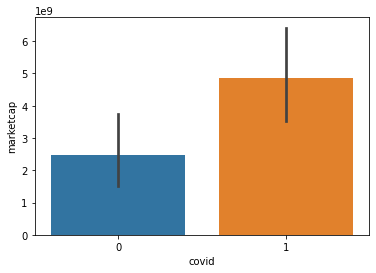

In [19]:
sns.barplot(x='covid', y='marketcap', data=df)

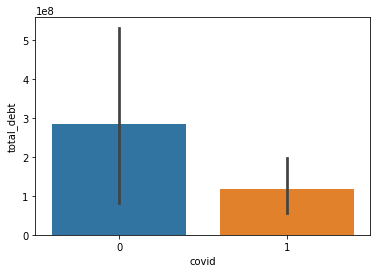

In [16]:
sns.barplot(x='covid', y='total_debt', data=df)

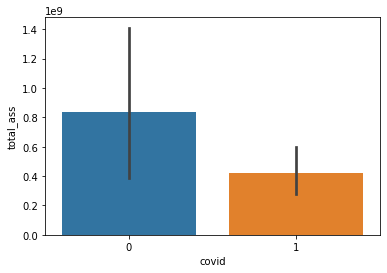

In [21]:
sns.barplot(x='covid', y='total_ass', data=df)

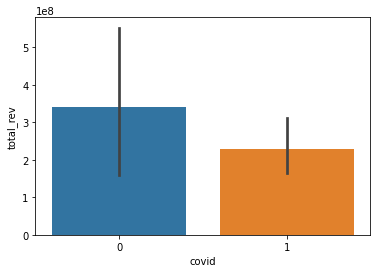

In [22]:
sns.barplot(x='covid', y='total_rev', data=df)

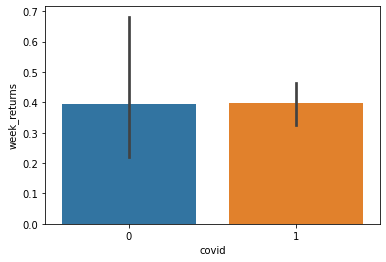

In [23]:
sns.barplot(x='covid', y='week_returns', data=df)

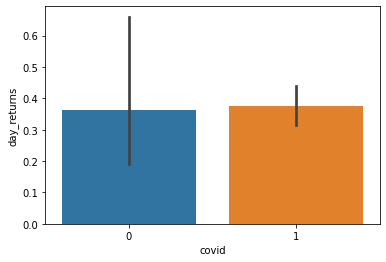

In [24]:
sns.barplot(x='covid', y='day_returns', data=df)

In [25]:
regr = LinearRegression()

In [45]:
X = df[['sector',
       'R&D_ratio', 'leverage', 'revenue_ratio', 'martketcap_log', 'age',
       'covid']]
y_1 = df['day_returns']
y_7 = df['week_returns']

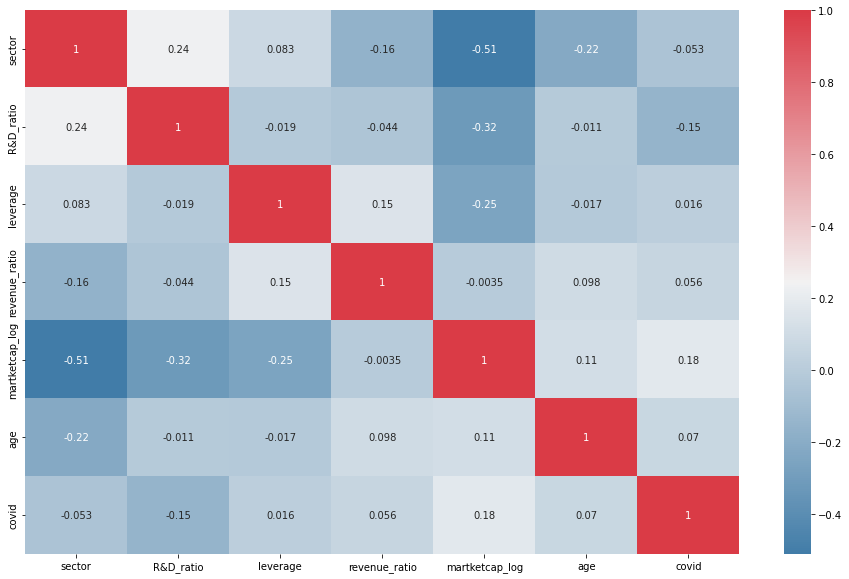

In [35]:
cmap = sns.diverging_palette(240, 10, n=9, as_cmap=True)

plt.figure(figsize=(16,10))
sns.heatmap(X.corr(),  annot=True, cmap=cmap)


In [38]:
answer_day = sm.OLS(y_1, add_constant(X)).fit()
answer_week = sm.OLS(y_7, add_constant(X)).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [39]:
answer_day.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            day_returns   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.9649
Date:                Tue, 28 Jun 2022   Prob (F-statistic):              0.457
Time:                        17:19:01   Log-Likelihood:                -483.50
No. Observations:                 340   AIC:                             983.0
Df Residuals:                     332   BIC:                             1014.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.7332      0.969      0.757      0.450      -1.173       2.639
sector            -0.2544      0.143     -1.784      0.075      -0.535       0.026
R&D_ratio         -2.0464      1.757     -1.165      0.245      -5.502       1.410
leverage           0.0032      0.022      0.145      0.885      -0.041       0.047
revenue_ratio     -0.0132      0.033     -0.398      0.691      -0.079       0.052
martketcap_log    -0.0054      0.044     -0.123      0.902      -0.091       0.080
age               -0.0007      0.008     -0.086      0.931      -0.016       0.014
covid             -0.0152      0.117     -0.130      0.897      -0.245       0.214
==============================================================================
Omnibus:                      705.007   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           778270.671
Skew:                          14.053   Prob(JB):                         0.00
Kurtosis:                     235.695   Cond. No.                         721.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
answer_week.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           week_returns   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     1.270
Date:                Tue, 28 Jun 2022   Prob (F-statistic):              0.265
Time:                        17:19:17   Log-Likelihood:                -486.25
No. Observations:                 340   AIC:                             988.5
Df Residuals:                     332   BIC:                             1019.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0975      0.977     -0.100      0.921      -2.019       1.824
sector            -0.1805      0.144     -1.255      0.210      -0.463       0.102
R&D_ratio         -2.4725      1.771     -1.396      0.164      -5.957       1.011
leverage          -0.0003      0.023     -0.015      0.988      -0.045       0.044
revenue_ratio     -0.0173      0.033     -0.516      0.606      -0.083       0.049
martketcap_log     0.0352      0.044      0.801      0.424      -0.051       0.122
age               -0.0005      0.008     -0.062      0.950      -0.016       0.015
covid             -0.0490      0.118     -0.417      0.677      -0.280       0.182
==============================================================================
Omnibus:                      694.072   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           707270.304
Skew:                          13.599   Prob(JB):                         0.00
Kurtosis:                     224.777   Cond. No.                         721.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_features= PolynomialFeatures(degree=2)
xp = polynomial_features.fit_transform(X)

In [42]:
model_day = sm.OLS(y_1, xp).fit()
model_week = sm.OLS(y_7, xp).fit()

In [43]:
xp.shape

(340, 36)

In [44]:
model_day.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            day_returns   R-squared:                       0.445
Model:                            OLS   Adj. R-squared:                  0.385
Method:                 Least Squares   F-statistic:                     7.444
Date:                Tue, 28 Jun 2022   Prob (F-statistic):           8.92e-24
Time:                        17:19:41   Log-Likelihood:                -386.73
No. Observations:                 340   AIC:                             841.5
Df Residuals:                     306   BIC:                             971.7
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -20.1839      9.380     -2.152      0.032     -38.641      -1.727
x1            -0.5097      1.057     -0.482      0.630      -2.590       1.571
x2           219.5297     45.154      4.862      0.000     130.677     308.382
x3             2.9284      0.527      5.562      0.000       1.892       3.964
x4             0.2811      1.120      0.251      0.802      -1.923       2.486
x5             1.6913      0.840      2.014      0.045       0.039       3.344
x6             0.0902      0.153      0.591      0.555      -0.210       0.391
x7            -1.2003      0.861     -1.395      0.164      -2.894       0.493
x8            -0.5097      1.057     -0.482      0.630      -2.590       1.571
x9           -13.7167      5.664     -2.422      0.016     -24.862      -2.571
x10           -1.8588      0.204     -9.125      0.000      -2.260      -1.458
x11            0.1653      0.188      0.880      0.380      -0.204       0.535
x12            0.0787      0.096      0.815      0.415      -0.111       0.268
x13           -0.0076      0.025     -0.301      0.763      -0.057       0.042
x14            0.2013      0.285      0.706      0.481      -0.360       0.762
x15          -32.9966     17.522     -1.883      0.061     -67.476       1.482
x16            9.0035      2.306      3.904      0.000       4.466      13.541
x17            4.4316      4.232      1.047      0.296      -3.896      12.759
x18          -10.6817      2.134     -5.005      0.000     -14.881      -6.482
x19           -0.3921      0.218     -1.795      0.074      -0.822       0.038
x20            8.2441      3.474      2.373      0.018       1.409      15.079
x21           -0.0065      0.005     -1.319      0.188      -0.016       0.003
x22           -0.0911      0.101     -0.902      0.368      -0.290       0.108
x23           -0.0515      0.023     -2.233      0.026      -0.097      -0.006
x24           -0.0231      0.007     -3.318      0.001      -0.037      -0.009
x25           -0.1459      0.055     -2.674      0.008      -0.253      -0.039
x26            0.0329      0.034      0.975      0.330      -0.034       0.099
x27           -0.0137      0.054     -0.255      0.799      -0.119       0.092
x28           -0.0313      0.016     -1.982      0.048      -0.062      -0.000
x29           -0.1039      0.193     -0.537      0.592      -0.485       0.277
x30           -0.0347      0.019     -1.823      0.069      -0.072       0.003
x31           -0.0020      0.007     -0.292      0.771      -0.015       0.011
x32            0.1057      0.077      1.381      0.168      -0.045       0.256
x33            0.0004      0.000      1.113      0.267      -0.000       0.001
x34           -0.0199      0.017     -1.174      0.241      -0.053       0.013
x35           -1.2003      0.861     -1.395      0.164      -2.894       0.493
==

In [46]:
model_week.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           week_returns   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.398
Method:                 Least Squares   F-statistic:                     7.793
Date:                Tue, 28 Jun 2022   Prob (F-statistic):           5.57e-25
Time:                        17:21:00   Log-Likelihood:                -387.04
No. Observations:                 340   AIC:                             842.1
Df Residuals:                     306   BIC:                             972.3
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -22.2361      9.388     -2.368      0.018     -40.710      -3.762
x1            -0.6735      1.058     -0.636      0.525      -2.756       1.409
x2           222.1934     45.196      4.916      0.000     133.260     311.127
x3             2.7687      0.527      5.254      0.000       1.732       3.806
x4             0.5249      1.121      0.468      0.640      -1.682       2.731
x5             1.8753      0.840      2.231      0.026       0.222       3.529
x6             0.0457      0.153      0.299      0.765      -0.255       0.346
x7            -1.3425      0.861     -1.558      0.120      -3.038       0.353
x8            -0.6735      1.058     -0.636      0.525      -2.756       1.409
x9           -12.6985      5.669     -2.240      0.026     -23.854      -1.543
x10           -1.9312      0.204     -9.471      0.000      -2.332      -1.530
x11            0.1910      0.188      1.016      0.310      -0.179       0.561
x12            0.0961      0.097      0.995      0.321      -0.094       0.286
x13           -0.0014      0.025     -0.057      0.955      -0.051       0.048
x14            0.1668      0.285      0.585      0.559      -0.395       0.728
x15          -33.7112     17.538     -1.922      0.056     -68.222       0.799
x16            9.3134      2.308      4.035      0.000       4.771      13.855
x17            3.6800      4.236      0.869      0.386      -4.655      12.015
x18          -10.9132      2.136     -5.109      0.000     -15.116      -6.710
x19           -0.2790      0.219     -1.276      0.203      -0.709       0.151
x20            8.3694      3.477      2.407      0.017       1.528      15.211
x21           -0.0030      0.005     -0.600      0.549      -0.013       0.007
x22           -0.0888      0.101     -0.879      0.380      -0.288       0.110
x23           -0.0423      0.023     -1.830      0.068      -0.088       0.003
x24           -0.0236      0.007     -3.385      0.001      -0.037      -0.010
x25           -0.1684      0.055     -3.085      0.002      -0.276      -0.061
x26            0.0308      0.034      0.910      0.364      -0.036       0.097
x27           -0.0246      0.054     -0.459      0.647      -0.130       0.081
x28           -0.0310      0.016     -1.962      0.051      -0.062    8.95e-05
x29           -0.0982      0.194     -0.507      0.613      -0.479       0.283
x30           -0.0386      0.019     -2.025      0.044      -0.076      -0.001
x31           -0.0005      0.007     -0.069      0.945      -0.014       0.013
x32            0.1196      0.077      1.561      0.120      -0.031       0.270
x33            0.0007      0.000      1.783      0.076   -6.84e-05       0.001
x34           -0.0237      0.017     -1.393      0.165      -0.057       0.010
x35           -1.3425      0.861     -1.558      0.120      -3.038       0.353
==